# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy.stats import pearsonr

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [99]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [100]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
temp = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cityies = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        wind_speed.append(response['wind']['speed'])
        cityies.append(city)
        print(f"we have found {city}")
        
        
    except:
        print("Oopsie")

#response = requests.get(query_url + "cleveland").json()
#print(json.dumps(response, indent=4, sort_keys=True))


we have found teahupoo
we have found saint-jean-port-joli
Oopsie
we have found busselton
Oopsie
we have found archidona
we have found harwich
we have found punta arenas
we have found souillac
we have found morant bay
we have found lebu
we have found avarua
we have found omboue
we have found gazanjyk
Oopsie
we have found ushuaia
we have found tura
we have found turukhansk
we have found albany
we have found sijunjung
we have found noumea
we have found pevek
we have found rikitea
we have found ribeira grande
we have found chokurdakh
we have found hermanus
we have found vaini
we have found windhoek
we have found aklavik
we have found klyuchi
we have found hasaki
we have found mayumba
we have found kingaroy
we have found codrington
we have found vilyuysk
we have found aldama
we have found maniitsoq
we have found baherden
we have found norman wells
we have found lompoc
we have found arandas
we have found arraial do cabo
Oopsie
we have found kharp
Oopsie
we have found ambon
we have found bluf

we have found sinegorskiy
we have found varhaug
we have found egvekinot
we have found ossora
Oopsie
we have found vanavara
we have found maragogi
we have found banda aceh
we have found pyshma
we have found sakakah
we have found fortuna
we have found wilmington
we have found cherskiy
we have found rancho veloz
we have found padang
we have found conceicao do araguaia
we have found namatanai
we have found sukumo
we have found fallon
we have found coihaique
we have found katherine
we have found bambous virieux
we have found rawson
we have found pelym
we have found okato
Oopsie
we have found atlantic city
we have found ovalle
we have found celica
we have found pondicherry
we have found verkhoyansk
Oopsie
we have found marawi
we have found santa cruz
we have found dungarpur
we have found novobirilyussy
we have found antofagasta
we have found pyay
we have found priargunsk
we have found dakar
we have found san
we have found zeya
we have found san vicente
we have found cuyo
we have found yinchu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [102]:
weather_df = pd.DataFrame({"City":cityies, "Lat":lat, "Lng":lng, "Max Temp":max_temp, "Humidity":humidity, 
                          "Cloudiness":cloudiness, "Wind Speed":wind_speed, "Country":country, "Date":date})

weather_df.to_csv('Weather.csv')


In [103]:
weather_df.head()
len(weather_df)

599

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [109]:
weather_df.drop(weather_df.loc[weather_df['Humidity']>100].index, inplace=False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,teahupoo,-17.83,-149.27,28.00,58,40,2.60,PF,1592870420
1,saint-jean-port-joli,47.22,-70.27,23.34,73,52,4.92,CA,1592870420
2,busselton,-33.65,115.33,14.44,73,51,8.89,AU,1592870420
3,archidona,37.10,-4.39,22.78,48,0,2.05,ES,1592870421
4,harwich,51.94,1.28,16.67,76,0,3.80,GB,1592870421


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Maximum Temperature')

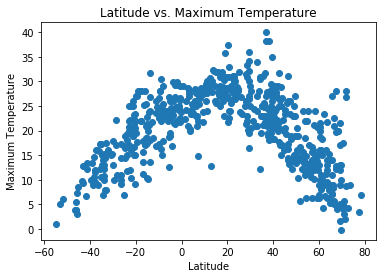

In [117]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs. Maximum Temperature")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Maximum Temperature')

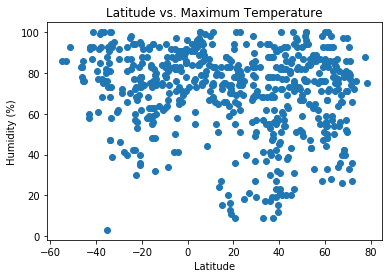

In [116]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness')

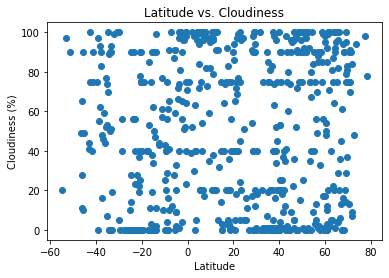

In [119]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed')

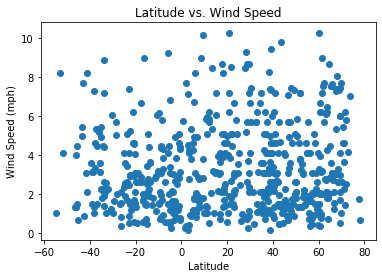

In [120]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: (0.7797043706910556, 2.4966250459166453e-42)
The linear equation is: y = 0.39x + 26.31


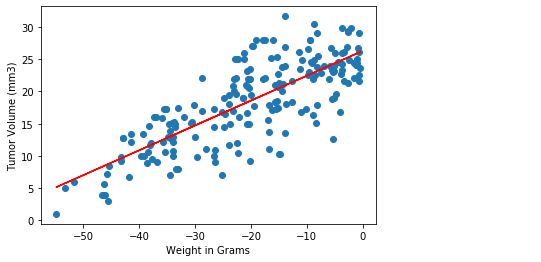

In [128]:
NH_df = weather_df.copy()
NH_df.drop(NH_df.loc[NH_df['Lat']>0].index, inplace=True)
temp = NH_df["Max Temp"]
lat = NH_df['Lat']
correlation = pearsonr(temp,lat)

x_values = NH_df['Lat']
y_values =  NH_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight in Grams')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient is: {correlation}")
print("The linear equation is: " + line_eq)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: (-0.7108186946399153, 1.7222225046118894e-62)
The linear equation is: y = -0.28x + 31.89


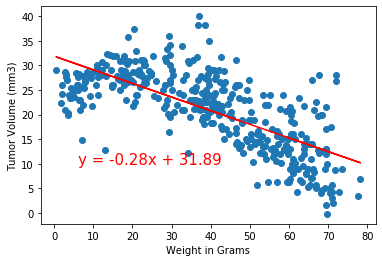

In [131]:
SHtemp_df = weather_df.copy()
SHtemp_df.drop(SHtemp_df.loc[SHtemp_df['Lat']<0].index, inplace=True)
temp = SHtemp_df["Max Temp"]
lat = SHtemp_df['Lat']
correlation = pearsonr(temp,lat)

x_values = SHtemp_df['Lat']
y_values =  SHtemp_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight in Grams')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient is: {correlation}")
print("The linear equation is: " + line_eq)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: (-0.039837159064265236, 0.5744637474429332)
The linear equation is: y = -0.03x + 20.94


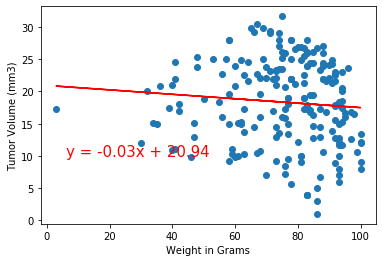

In [141]:
NHhumidity_df = weather_df.copy()
NHhumidity_df.drop(NHhumidity_df.loc[NHhumidity_df['Lat']>0].index, inplace=True)
humidity = NHhumidity_df["Humidity"]
lat = NHhumidity_df['Lat']
correlation = pearsonr(humidity,lat)

x_values = NHhumidity_df['Humidity']
y_values =  NHhumidity_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight in Grams')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient is: {correlation}")
print("The linear equation is: " + line_eq)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: (-0.08698476793347035, 0.08306563833891531)
The linear equation is: y = -0.13x + 30.12


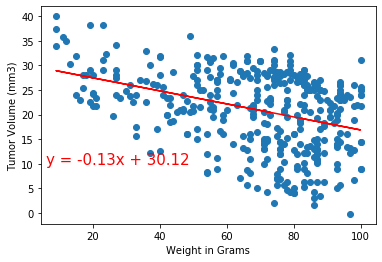

In [145]:
SHhumidity_df = weather_df.copy()
SHhumidity_df.drop(SHhumidity_df.loc[SHhumidity_df['Lat']<0].index, inplace=True)
humidity = SHhumidity_df["Humidity"]
lat = SHhumidity_df['Lat']
correlation = pearsonr(humidity,lat)

x_values = SHhumidity_df['Humidity']
y_values =  SHhumidity_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight in Grams')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient is: {correlation}")
print("The linear equation is: " + line_eq)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: (-0.0030036406742316897, 0.9662448259341402)
The linear equation is: y = 0.03x + 17.21


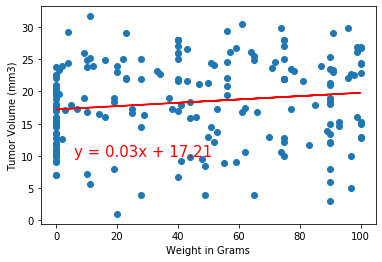

In [148]:
NHCloud_df = weather_df.copy()
NHCloud_df.drop(NHCloud_df.loc[NHCloud_df['Lat']>0].index, inplace=True)
cloud = NHCloud_df["Cloudiness"]
lat = NHCloud_df['Lat']
correlation = pearsonr(cloud,lat)

x_values = NHCloud_df['Cloudiness']
y_values =  NHCloud_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight in Grams')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient is: {correlation}")
print("The linear equation is: " + line_eq)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: (-0.039837159064265236, 0.5744637474429332)
The linear equation is: y = 0.03x + 17.21


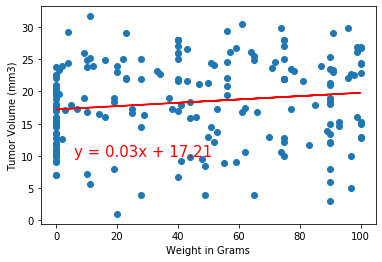

In [149]:
SHCloud_df = weather_df.copy()
SHCloud_df.drop(SHCloud_df.loc[SHCloud_df['Lat']>0].index, inplace=True)
cloud = SHCloud_df["Cloudiness"]
lat = SHCloud_df['Lat']
correlation = pearsonr(humidity,lat)

x_values = SHCloud_df['Cloudiness']
y_values =  SHCloud_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight in Grams')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient is: {correlation}")
print("The linear equation is: " + line_eq)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: (-0.14661055744092133, 0.037816740643512606)
The linear equation is: y = 0.21x + 17.74


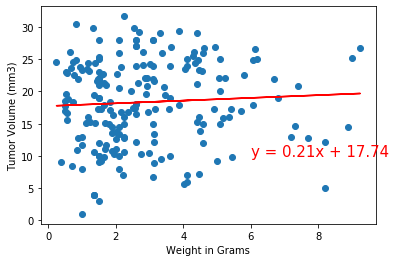

In [151]:
NHWind_df = weather_df.copy()
NHWind_df.drop(NHWind_df.loc[NHWind_df['Lat']>0].index, inplace=True)
wind = NHWind_df["Wind Speed"]
lat = NHWind_df['Lat']
correlation = pearsonr(wind,lat)

x_values = NHWind_df['Wind Speed']
y_values =  NHWind_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight in Grams')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient is: {correlation}")
print("The linear equation is: " + line_eq)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: (-0.14661055744092133, 0.037816740643512606)
The linear equation is: y = 0.21x + 17.74


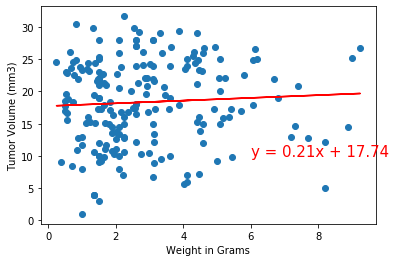

In [152]:
SHWind_df = weather_df.copy()
SHWind_df.drop(SHWind_df.loc[SHWind_df['Lat']>0].index, inplace=True)
wind = SHWind_df["Wind Speed"]
lat = SHWind_df['Lat']
correlation = pearsonr(wind,lat)

x_values = SHWind_df['Wind Speed']
y_values =  SHWind_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight in Grams')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient is: {correlation}")
print("The linear equation is: " + line_eq)
plt.show()